In [1]:
import numpy as np
import pandas as pd
import scanpy.api as sc
import matplotlib.pyplot as plt
%matplotlib notebook
import timeit
start_time=timeit.default_timer()

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()
results_file = './write/pmbc3k.h5ad'

/home/ehamilton/miniconda3/envs/singlecellanalysis/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


scanpy==1.0.4 anndata==0.6.1 numpy==1.14.3 scipy==1.1.0 pandas==0.23.0 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
Data1 = pd.read_csv('NewDownsizedCellList300_1.csv', sep='\t')

In [3]:
Data2 = pd.read_csv('NewDownsizedCellList300_2.csv', sep='\t')

In [4]:
Data3 = pd.read_csv('NewDownsizedCellList300_3.csv', sep='\t')

In [5]:
Data4 = pd.read_csv('NewDownsizedCellList300_4.csv', sep='\t')

In [6]:
Data5 = pd.read_csv('NewDownsizedCellList300_5.csv', sep='\t')

In [7]:
Orig = pd.read_csv('NewCellList.csv', sep='\t')

In [8]:
Comparison1 = pd.merge(Data1, Orig, on='index')

In [9]:
Test1=(Comparison1['louvain_x']==Comparison1['louvain_y'])

In [10]:
sum(Test1)

87

In [11]:
Comparison2 = pd.merge(Data2, Orig, on='index')

In [12]:
Test2=(Comparison2['louvain_x'] == Comparison2['louvain_y'])

In [13]:
sum(Test2)

132

In [14]:
Comparison3 = pd.merge(Data3, Orig, on='index')

In [15]:
Test3=(Comparison3['louvain_x'] == Comparison3['louvain_y'])

In [16]:
sum(Test3)

50

In [17]:
Comparison4 = pd.merge(Data4, Orig, on='index')

In [18]:
Test4=(Comparison4['louvain_x'] == Comparison4['louvain_y'])

In [19]:
sum(Test4)

131

In [20]:
Comparison5 = pd.merge(Data5, Orig, on='index')

In [21]:
Test5=(Comparison5['louvain_x'] == Comparison5['louvain_y'])

In [22]:
sum(Test5)

74

In [23]:
Averages=[0.316, 0.2716, 0.3754, 0.4994]

In [24]:
Std=[0.12012, 0.06124, 0.15544, 0.15188]

In [25]:
import numpy as np
import matplotlib.pyplot as plt


In [26]:
barWidth = 0.5
Averages=[31.6, 27.16, 37.54, 49.94]
Std=[12.012, 6.124, 15.544, 15.188]

Text(0.5,1,'Average Cell Comparison')

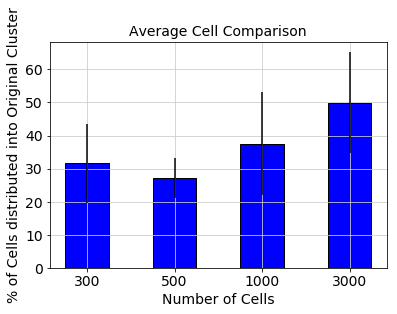

In [27]:
r1 = np.arange(len(Averages))
plt.bar(r1, Averages, width = barWidth, color = 'blue', edgecolor = 'black', yerr=Std)
plt.xticks([r for r in range(len(Averages))], ['300', '500', '1000', '3000'])
plt.ylabel('% of Cells distributed into Original Cluster')
plt.xlabel('Number of Cells')
plt.title('Average Cell Comparison')

In [28]:
Comparison1.groupby(["louvain_y", "louvain_x"]).size()

louvain_y  louvain_x
0          0            78
           1            28
           2            14
           3            33
           4            26
1          0             6
           1             5
           2            35
           3             7
2          0             2
           1            40
           3             2
           4             3
3          0             5
           2             8
           3             4
4          0             3
           2             1
dtype: int64

In [29]:
Comparison2.groupby(["louvain_y", "louvain_x"]).size()

louvain_y  louvain_x
0          0            72
           1            16
           2            29
           3            42
           4            29
1          0             4
           1            40
           2             4
           3             7
           4             3
2          0             3
           1             2
           2            19
           3             2
           4             9
3          0             4
           1             9
           2             2
           3             1
4          1             1
           3             2
dtype: int64

In [30]:
Comparison3.groupby(["louvain_y", "louvain_x"]).size()

louvain_y  louvain_x
0          0            43
           1            64
           2            27
           3            42
           4            26
1          0             2
           1             5
           2            36
           3             1
           4             2
2          0            33
           2             2
           3             2
3          0             1
           1             3
           2             4
           4             3
4          1             4
dtype: int64

In [31]:
Comparison4.groupby(["louvain_y", "louvain_x"]).size()

louvain_y  louvain_x
0          0            83
           1            21
           2            33
           3            34
           4            21
1          0             3
           1            28
           2             4
           3             6
           4            11
2          0             3
           2            19
           3             2
           4            10
3          0             3
           1            12
           2             2
           3             1
           4             1
4          0             2
           3             1
dtype: int64

In [32]:
Comparison5.groupby(["louvain_y", "louvain_x"]).size()

louvain_y  louvain_x
0          0            69
           1            31
           2            28
           3            62
           4             4
1          0            16
           1             3
           2            38
2          1            38
           3             1
3          0             1
           1             1
           2             4
           3             2
4          0             2
dtype: int64

In [33]:
from sklearn import metrics
metrics.adjusted_rand_score(Comparison1['louvain_y'], Comparison1['louvain_x'])  

0.16047767303511037

In [34]:
metrics.adjusted_rand_score(Comparison2['louvain_y'], Comparison2['louvain_x'])

0.11975489697495137

In [35]:
metrics.adjusted_rand_score(Comparison3['louvain_y'], Comparison3['louvain_x'])

0.07727691049665336

In [36]:
metrics.adjusted_rand_score(Comparison4['louvain_y'], Comparison4['louvain_x'])

0.11725258037162449

In [37]:
metrics.adjusted_rand_score(Comparison5['louvain_y'], Comparison5['louvain_x'])

0.1353566327568117